In [101]:
import pandas as pd
import numpy as np
import json
pd.set_option('display.max_columns', 500)

MARKET = "eth_mapollo_usdc"
MARKET = "eth_rlp_usdc"

EVENTS_PATH = "/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_labelled"
HOURLY_MARKET_PATH = "/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_hourly_data"

df = pd.read_csv(f"/Users/yegortrussov/Documents/ml/lending_protocols/dataset_collection/data/markets_enriched/{MARKET}.csv")

df = pd.read_csv(f"{EVENTS_PATH}/{MARKET}.csv")
market_df = pd.read_csv(f"{HOURLY_MARKET_PATH}/{MARKET}.csv")

df.head(2)

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_49691/3455336648.py:12: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/hj/pbs977kd43s6n1l9z3mxrj200000gn/T/ipykernel_49691/3455336648.py:14: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



,hash,type,timestamp,user_address,assets,assets_usd,liquidated_assets,liquidated_assets_usd,market,datetime,market_address,total_supply_before,total_borrow_before,total_supply_after,total_borrow_after,utilization_before,utilization_after,tx_actions,borrow_rate_before,supply_rate_before,borrow_rate_after,supply_rate_after,collateral_price,loan_asset_price,collateral_before,collateral_value_before,debt_before,ltv_before,collateral_after,collateral_value_after,debt_after,ltv_after,health_factor_before,health_factor_after,event_type,vault_flg,volatility_1h,drawdown_1h,trend_1h,volatility_6h,drawdown_6h,trend_6h,volatility_24h,drawdown_24h,trend_24h,hash_short,event_sequence_type
0,0x4ffb21a0b6ce460bf11305242993f70620690289339e...,MarketSupply,1761601475,0x000000000000000000000000000000000000dEaD,10729,0.010728,0,0.0,eth_rlp_usdc,2025-10-27 21:44:35,0xe1b65304edd8ceaea9b629df4c3c926a37d1216e2790...,4.765878e+07,4.300108e+07,4.765884e+07,4.300114e+07,0.902270,0.902270,1,0.066700,0.060215,0.066701,0.060215,1.253657,0.999898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_position_supply,False,0,0,0,0.000214,-0.000459,0.000459,0.000129,-0.000599,0.000419,0x4ffb21a0,loan_position_supply
1,0x8d1e088aed77ed17840bc47e2735537a1d1d4f9debf2...,MarketSupply,1768843499,0x0000000f2eB9f69274678c76222B35eEc7588a65,10000000,9.997059,0,0.0,eth_rlp_usdc,2026-01-19 17:24:59,0xe1b65304edd8ceaea9b629df4c3c926a37d1216e2790...,8.325207e+07,7.591832e+07,8.325239e+07,7.591863e+07,0.911909,0.911909,1,0.101585,0.092671,0.101585,0.092671,1.279744,0.999799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_position_supply,False,0,0,0,0.000888,-0.000525,-0.002052,0.000956,-0.000603,0.000015,0x8d1e088a,loan_position_supply


In [102]:
df["market_address"].unique()

array(['0xe1b65304edd8ceaea9b629df4c3c926a37d1216e27900505c04f14b2ed279f33'],
      dtype=object)

In [126]:
# _ = plot_daily_metrics_express(apollo_metrics, ["borrow_rate_after", "supply_rate_after"], agg_func="mean")
df[df["vault_flg"] == False]["user_address"].value_counts()[:40]

user_address
0x0C36327e93F749a7eec04603410dF776150f47DE    6842
0x0F359FD18BDa75e9c49bC027E7da59a4b01BF32a    1254
0x000001ac4e512d670c34feDf6c71cE2F49fb160a     857
0xcB82e29930835A937429D4BCAD0a6fa6636755D7     581
0xE08D97e151473A848C3d9CA3f323Cb720472D015     481
0xe33Eaf6EE64f4B9353ff2ce3748FA05EEb9bd809     442
0xc6dD9976066F3364b4D6A72cD4F1fA0468327Aa7     325
0xba15E9b644685cB845aF18a738Abd40C6Bcd78eD     230
0x7193794ec82f527Efb618Ac50C078D348eCBA4b6     202
0xd6c757043e7d59088969B188923C62fa960aFE9B     197
0x1ed2584074B802929c7D94Ca43459AC9b074141d     175
0xBe7e92a1aa52Bf219979fB571c5d42a6B4107AbF     173
0x4a4037E53306f284cf214B733E9A54D6a5939818     159
0x55555815a5595991C3A0Ff119B59AEF6C8B55555     150
0x22F34f08406073bd27239cBaCF7942Ba0477704A     143
0x1597E4B7cF6D2877A1d690b6088668afDb045763     137
0x9178eBE0691593184c1D785a864B62a326cc3509     136
0x5dE1B7f14De50Ed6e430ea144eED8Bc9d0Bbb30C     124
0x478a1d816FB121fEf7263949d7869B896F2D569e     123
0x650bdBA05A0E6549

In [122]:
addr = "0xd6c757043e7d59088969B188923C62fa960aFE9B"

df[df["user_address"] == addr][[
    "datetime",
    "type",
    "debt_after",
    "collateral_value_after",
    "ltv_after",
    "event_type",
    "event_sequence_type",
    # "hash"
]].sort_values("datetime")[:50]

,datetime,type,debt_after,collateral_value_after,ltv_after,event_type,event_sequence_type
54864,2025-10-23 03:12:59,MarketSupplyCollateral,4.699877e+05,5.620947e+05,0.836300,position_open,position_open
54865,2025-10-23 03:12:59,MarketBorrow,4.699877e+05,5.620947e+05,0.836300,position_open,position_open
54866,2025-10-23 03:28:59,MarketSupplyCollateral,4.699877e+05,1.099207e+06,0.427654,collateral_add,collateral_add
54867,2025-10-23 05:26:11,MarketBorrow,8.995300e+05,1.099210e+06,0.818502,borrow_more,borrow_more
54868,2025-10-23 09:11:47,MarketSupplyCollateral,8.995501e+05,2.165402e+06,0.415491,collateral_add,collateral_add
54869,2025-10-23 12:19:47,MarketBorrow,1.799488e+06,2.160864e+06,0.832864,borrow_more,borrow_more
54870,2025-10-23 12:33:47,MarketSupplyCollateral,1.999294e+06,3.290923e+06,0.607643,borrow_more_w_collateral,borrow_more_w_collateral
54871,2025-10-23 12:33:47,MarketBorrow,1.999294e+06,3.290923e+06,0.607643,borrow_more_w_collateral,borrow_more_w_collateral
54872,2025-10-27 05:15:59,MarketBorrow,2.694036e+06,3.300247e+06,0.816485,borrow_more,borrow_more
54873,2025-10-28 06:35:35,MarketRepay,1.794602e+06,3.301902e+06,0.543506,repay_partial,repay_partial


In [118]:
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def create_hourly_user_dataset(df_actions, df_market, n_hours=1, threshold_date=None):
    df_actions = df_actions.sort_values(['user_address', 'timestamp']).copy()
    df_actions = df_actions.drop_duplicates(['user_address', 'timestamp', "hash"])
    df_market = df_market.sort_values('timestamp').copy()
    
    market_timestamps = df_market['timestamp'].values
    
    result_rows = []
    
    for user, user_df in df_actions.groupby('user_address'):
        # Find position open event
        if user == "0xE08D97e151473A848C3d9CA3f323Cb720472D015":
            print("here")
        open_events = user_df[user_df['event_sequence_type'] == 'position_open']
        if open_events.empty:
            continue
        
        position_open_time = open_events.iloc[0]['timestamp']
        
        # Find first position close event after open
        close_events = user_df[(user_df['event_sequence_type'] == 'position_close') & 
                               (user_df['timestamp'] > position_open_time)]
        if user == "0xE08D97e151473A848C3d9CA3f323Cb720472D015":
            print("here")
        if not close_events.empty:
            close_time = close_events.iloc[0]['timestamp']
        else:
            if threshold_date:
                threshold_ts = int(pd.Timestamp(threshold_date).timestamp())
                close_time = threshold_ts
            else:
                continue
        
        # Get actions between open and close (inclusive)
        user_df = user_df[(user_df['timestamp'] >= position_open_time) & 
                         (user_df['timestamp'] <= close_time)].copy()
        
        if user == "0xE08D97e151473A848C3d9CA3f323Cb720472D015":
            print(user_df.shape)
        
        if user_df.empty:
            continue
        
        hours_step = n_hours * 3600
        user_hours = np.arange(position_open_time, close_time + hours_step, hours_step)
        
        # Create mapping of timestamp to state after action
        state_map = {}
        for _, action in user_df.iterrows():
            state_map[action['timestamp']] = {
                'collateral': action['collateral_after'],
                'debt': action['debt_after'],
                'event_type': action['event_sequence_type']
            }
        
        # Initialize with first state
        first_state = state_map[user_df.iloc[0]['timestamp']]
        collateral = first_state['collateral']
        debt = first_state['debt']
        
        for hour_ts in user_hours:
            market_idx = np.searchsorted(market_timestamps, hour_ts, side='right') - 1
            if market_idx < 0:
                continue
            market_row = df_market.iloc[market_idx]
            
            # Find closest action <= current hour
            actions_before = [ts for ts in state_map.keys() if ts <= hour_ts]
            if actions_before:
                closest_ts = max(actions_before)
                collateral = state_map[closest_ts]['collateral']
                debt = state_map[closest_ts]['debt']
                current_event = state_map[closest_ts]['event_type']
                
                # Check if this is the closing action
                if current_event == 'position_close' and abs(closest_ts - hour_ts) < hours_step:
                    action_type = 'position_close'
                elif abs(closest_ts - hour_ts) < hours_step:
                    action_type = current_event
                else:
                    action_type = 'none'
            else:
                action_type = 'none'
            
            if abs(debt) < 1e-6:
                debt = 0
            if abs(collateral) < 1e-11:
                collateral = 0
            
            collateral_price = market_row['collateral_price']
            loan_price = market_row['loan_asset_price'] if market_row['loan_asset_price'] > 0 else 1
            
            ltv = (debt * loan_price) / (collateral * collateral_price) if collateral * collateral_price > 0 else 0
            
            result_rows.append({
                'user_address': user,
                'timestamp': hour_ts,
                'datetime': pd.to_datetime(hour_ts, unit='s'),
                'collateral': collateral,
                'debt': debt,
                'ltv': ltv,
                'action': action_type,
                'total_supply': market_row['total_supply'],
                'total_borrow': market_row['total_borrow'],
                'market_utilization': market_row['utilization'],
                'borrow_rate': market_row['borrow_rate'],
                'supply_rate': market_row['supply_rate'],
                'collateral_price': collateral_price,
                'loan_asset_price': loan_price,
                'volatility_6h': market_row['volatility_6h'],
                'drawdown_6h': market_row['drawdown_6h']
            })
            
            if action_type == 'position_close':
                break
    
    return pd.DataFrame(result_rows).sort_values(["user_address", "timestamp"])


def plot_user_metrics(df, fields, user_address=None):
    """
    Plot time series metrics with action markers using Plotly.
    """
    if user_address:
        plot_df = df[df['user_address'] == user_address].copy()
        if plot_df.empty:
            print(f"No data for user {user_address}")
            return
    else:
        plot_df = df.copy()
    
    plot_df = plot_df.sort_values('timestamp')
    plot_df['datetime'] = pd.to_datetime(plot_df['timestamp'], unit='s')
    
    # Create subplot with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": len(fields) > 1}]])
    
    colors = px.colors.qualitative.Plotly

    plot_df[fields[0]] = plot_df[fields[0]].clip(0, plot_df[fields[0]].max())
    
    # Add first field
    fig.add_trace(
        go.Scatter(x=plot_df['datetime'], y=plot_df[fields[0]],
                  mode='lines+markers',
                  name=fields[0],
                  line=dict(color=colors[0], width=2),
                  marker=dict(size=4)),
        secondary_y=False
    )
    
    # Add second field if exists
    if len(fields) > 1:
        fig.add_trace(
            go.Scatter(x=plot_df['datetime'], y=plot_df[fields[1]],
                      mode='lines+markers',
                      name=fields[1],
                      line=dict(color=colors[1], width=2),
                      marker=dict(size=4)),
            secondary_y=True
        )
    
    # Add action markers
    action_df = plot_df[plot_df['action'] != 'none'].copy()
    
    # Get y-axis ranges
    
    print(plot_df[fields[0]].min())
    y1_min, y1_max = plot_df[fields[0]].min(), plot_df[fields[0]].max()
    y1_min = max(y1_min,0)
    y1_range = y1_max - y1_min
    print(y1_range)
    
    for i, (idx, row) in enumerate(action_df.iterrows()):
        # Add vertical line
        fig.add_vline(x=row['datetime'], line_dash="dash", 
                     line_color="gray", opacity=0.5, line_width=1)
        
        # Add action label using first y-axis scale
        y_pos = y1_max - (i * y1_range * 0.05)
        fig.add_annotation(
            x=row['datetime'],
            y=y_pos,
            text=row['action'],
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=1,
            arrowcolor="darkgray",
            ax=40,
            ay=-20,
            font=dict(size=10),
            bgcolor="rgba(255, 255, 0, 0.7)",
            bordercolor="black",
            borderwidth=1,
            borderpad=4,
            yref="y"  # Explicitly use left axis
        )
    
    # Update layout
    title = f"User Metrics - {user_address[:10]}..." if user_address else "User Metrics - All Users"
    fig.update_layout(
        title=dict(text=title, x=0.5, font=dict(size=16)),
        hovermode='x unified',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        template="plotly_white"
    )
    
    # Update axes
    fig.update_xaxes(title_text="Time", tickformat="%Y-%m-%d %H:%M")
    fig.update_yaxes(title_text=fields[0], secondary_y=False)
    if len(fields) > 1:
        fig.update_yaxes(title_text=fields[1], secondary_y=True)
    
    fig.show()

hourly_data = create_hourly_user_dataset(
    df,
    market_df,
    n_hours=0.5,
    threshold_date="2026-02-22",
)

# Example usage


here
here
(244, 47)


In [129]:
plot_user_metrics(hourly_data, ['ltv', 'debt'], user_address='0x1597E4B7cF6D2877A1d690b6088668afDb045763')

0.0
0.8555478802748677


'2026-02-22 14:00:00'

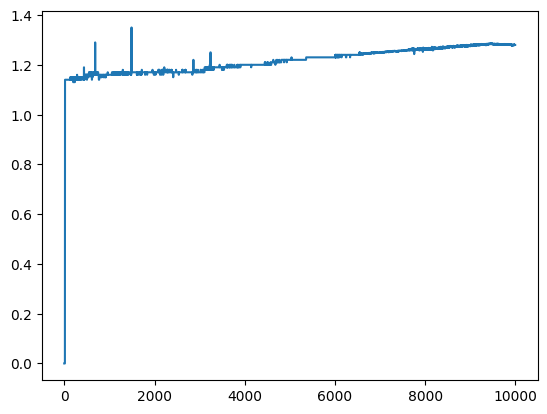

In [100]:
market_df[market_df["datetime"] > "2022-02-19"]["collateral_price"].plot()
market_df["datetime"].max()

In [93]:
leverage_users = [
    "0xaf1A4E223940B30FBABC425851381748E3aEe969",
    "0x2b6D91d5C378F3FFBeeF113A5DdcB98b5FAC1119",
    "0x9C571D0f16DB402a5F7176Dc9F97Ee57e42Ca82D",
    
]
df.groupby("user_address")["debt_after"].max().reset_index().sort_values("debt_after")

,user_address,debt_after
0,0x000000000000000000000000000000000000dEaD,0.000000e+00
398,0x8Bd25382735D2c60f6C6fCbC62bde9aE2c5ECcCa,0.000000e+00
397,0x8BA2e0d610c96B767A8ca99038c4dE600771063B,0.000000e+00
396,0x8A25d8C9fa8C7A726137f2D618d85CbC2C083F78,0.000000e+00
395,0x89Fc4e65ceEE63F4d32C8820cE095d02E977956a,0.000000e+00
...,...,...
68,0x1597E4B7cF6D2877A1d690b6088668afDb045763,1.954711e+07
431,0x971B34b997843b82051b3e781d6A6d5A21BbDDA0,2.101439e+07
65,0x14bCD9da052Cdc6fE0b9446d5a616D5b7B4d4550,2.499414e+07
634,0xd6c757043e7d59088969B188923C62fa960aFE9B,2.740096e+07
